In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

external_path=''

In [2]:
def concept_algebra_cav(positive_digit,negative_digit):
    concept_vector=torch.load(f'{external_path}\\concept_activation_vectors\\{positive_digit}_{negative_digit}.pt')
    destination_digits=[digit for digit in range(10) if digit!=positive_digit and digit!=negative_digit]
    target_concept_vectors=[torch.load(f'{external_path}\\concept_activation_vectors\\{destination_digit}_{negative_digit}.pt') for destination_digit in destination_digits]
    most_similar_destination_concepts=[]
    max_similarities=[]
    for destination_digit in destination_digits:
        second_concept_vector=torch.load(f'{external_path}\\concept_activation_vectors\\{destination_digit}_{positive_digit}.pt')
        compounded_concept_vector=concept_vector+second_concept_vector
        similarities_to_target_vectors=np.zeros(len(destination_digits))
        for k,target_concept_vector in enumerate(target_concept_vectors):
            similarities_to_target_vectors[k]=(torch.dot(compounded_concept_vector,target_concept_vector)/torch.norm(compounded_concept_vector)).item()
        most_similar_destination_concept=destination_digits[np.argmax(similarities_to_target_vectors)]
        most_similar_destination_concepts.append(most_similar_destination_concept)
        max_similarities.append(np.max(similarities_to_target_vectors))
    return most_similar_destination_concepts,destination_digits,max_similarities

In [3]:
def concept_algebra_cbv(positive_digit,negative_digit):
    concept_vector=np.load(f'{external_path}\\concept_boundary_vectors\\{positive_digit}_{negative_digit}.npy')
    destination_digits=[digit for digit in range(10) if digit!=positive_digit and digit!=negative_digit]
    target_concept_vectors=[np.load(f'{external_path}\\concept_boundary_vectors\\{destination_digit}_{negative_digit}.npy') for destination_digit in destination_digits]
    most_similar_destination_concepts=[]
    max_similarities=[]
    for destination_digit in destination_digits:
        second_concept_vector=np.load(f'{external_path}\\concept_boundary_vectors\\{destination_digit}_{positive_digit}.npy')
        compounded_concept_vector=concept_vector+second_concept_vector
        similarities_to_target_vectors=np.zeros(len(destination_digits))
        for k,target_concept_vector in enumerate(target_concept_vectors):
            similarities_to_target_vectors[k]=np.dot(compounded_concept_vector,target_concept_vector)/np.linalg.norm(compounded_concept_vector)
        most_similar_destination_concept=destination_digits[np.argmax(similarities_to_target_vectors)]
        most_similar_destination_concepts.append(most_similar_destination_concept)
        max_similarities.append(np.max(similarities_to_target_vectors))
    return most_similar_destination_concepts,destination_digits,max_similarities

In [4]:
concept_algebras_cav=np.zeros((90,8))
concept_algebras_cbv=np.zeros((90,8))
similarities_cav=[]
similarities_cbv=[]
abs_x=0
for positive_digit in range(10):
    abs_y=0
    for negative_digit in range(10):
        if positive_digit==negative_digit:
            continue
        most_similar_cav,destination_digits,max_similarities_cav=concept_algebra_cav(positive_digit,negative_digit)
        most_similar_cbv,destination_digits,max_similarities_cbv=concept_algebra_cbv(positive_digit,negative_digit)
        concept_algebras_cav[abs_x*9+abs_y,:]=np.array([1 if most_similar==destination else 0 for most_similar,destination in zip(most_similar_cav,destination_digits)])
        concept_algebras_cbv[abs_x*9+abs_y,:]=np.array([1 if most_similar==destination else 0 for most_similar,destination in zip(most_similar_cbv,destination_digits)])
        similarities_cav+=[max_similarities_cav[n] for n in range(len(max_similarities_cav)) if most_similar_cav[n]==destination_digits[n]]
        similarities_cbv+=[max_similarities_cbv[n] for n in range(len(max_similarities_cbv)) if most_similar_cbv[n]==destination_digits[n]]
        abs_y+=1
    abs_x+=1

[Text(0.25, 0, 'Failure'), Text(0.75, 0, 'Success')]

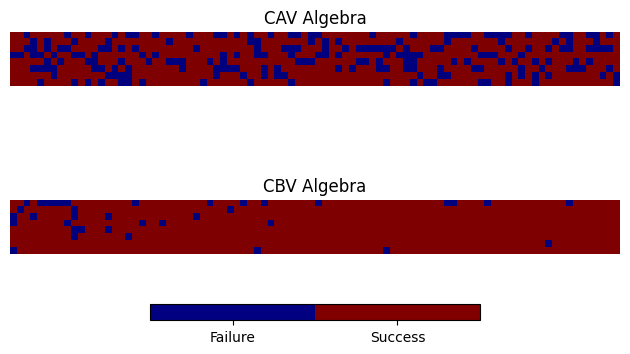

In [5]:
fig,axs=plt.subplots(nrows=2,ncols=1,layout='tight')
colors=plt.get_cmap('jet',2)
axs[0].imshow(concept_algebras_cav.T,vmin=0,vmax=1,cmap=colors)
im=axs[1].imshow(concept_algebras_cbv.T,vmin=0,vmax=1,cmap=colors)
axs[0].axis('off')
axs[0].set_title('CAV Algebra')
axs[1].axis('off')
axs[1].set_title('CBV Algebra')
cbar=fig.colorbar(im,fraction=0.05,location='bottom',orientation='horizontal',ticks=(0.25,0.75))
cbar.ax.set_xticklabels(['Failure','Success'])

[]

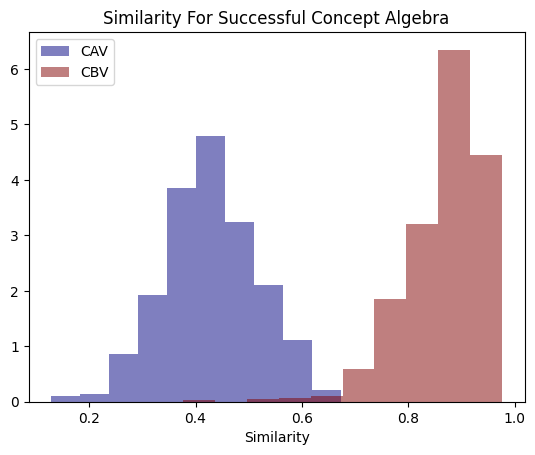

In [6]:
colors=plt.cm.jet(np.linspace(0,1,2))
fig,axs=plt.subplots(nrows=1,ncols=1)
axs.hist(similarities_cav,color=colors[0],alpha=0.5,density=True,label='CAV')
axs.hist(similarities_cbv,color=colors[1],alpha=0.5,density=True,label='CBV')
axs.set_title('Similarity For Successful Concept Algebra')
axs.set_xlabel('Similarity')
axs.legend()
plt.plot()